In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib 
import os
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

In [2]:
df = pd.read_csv('supplier_data.csv')

In [8]:
df.shape

(200, 13)

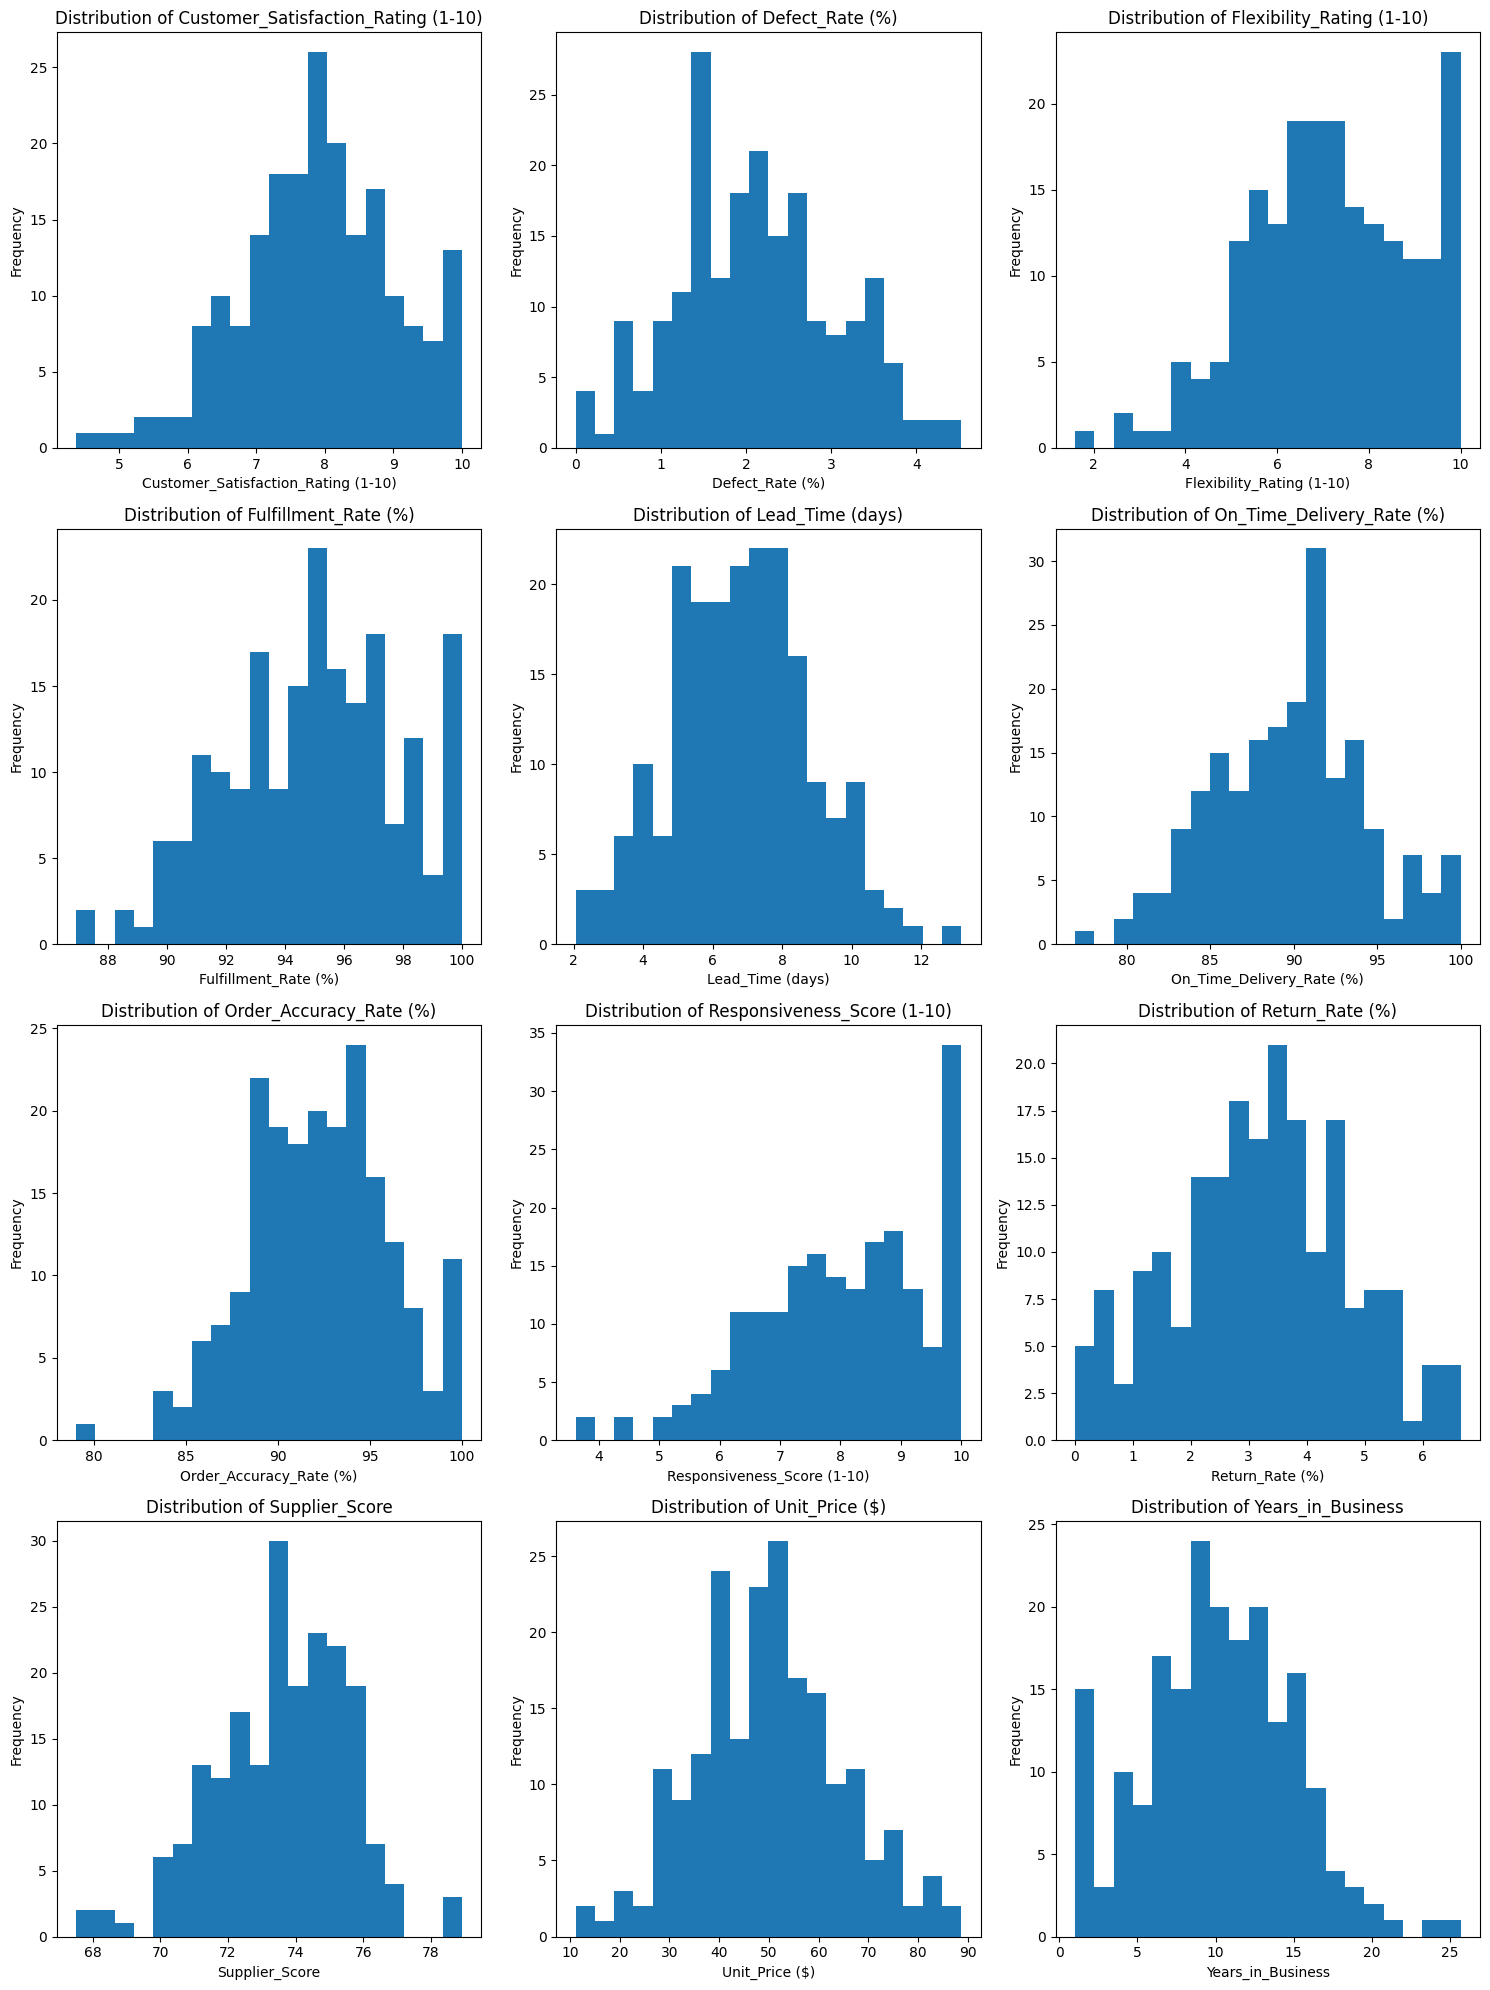

In [3]:
columns_to_plot = df.columns.difference(['Supplier_ID'])

num_plots = len(columns_to_plot)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    axes[i].hist(df[column], bins=20)
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")


for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [4]:
X = df.drop(columns=['Supplier_ID', 'Supplier_Score'])
y = df['Supplier_Score']

In [6]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## training function 

In [13]:


def train_supplier_model(X_train, y_train, X_test, y_test, model_dir='ml_models/supplier_model', model_name='supplier_model.pkl'):

    os.makedirs(model_dir, exist_ok=True)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_path = os.path.join(model_dir, model_name)
    joblib.dump(model, model_path)

    print(f"Model saved to {model_path}")
    print(f"MAE: {mae:.4f}, R2 Score: {r2:.4f}")

    return model, mae, r2


In [14]:

model, mae, r2 = train_supplier_model(X_train, y_train, X_test, y_test)


Model saved to ml_models/supplier_model\supplier_model.pkl
MAE: 0.0000, R2 Score: 1.0000


## Validating the model using data

In [20]:

def evaluate_suppliers(supplier_df, model_path='ml_models/supplier_model/supplier_model.pkl'):
    
    if not os.path.exists(model_path):
        raise FileNotFoundError(f"Model not found at {model_path}")

    model = joblib.load(model_path)

    
    if 'Supplier_ID' not in supplier_df.columns:
        raise ValueError("The DataFrame must contain a 'Supplier_ID' column.")

    features = supplier_df.drop(columns=['Supplier_ID'])
    predicted_scores = model.predict(features)

    supplier_df['Predicted_Supplier_Score'] = predicted_scores


    top_supplier = supplier_df.sort_values(by='Predicted_Supplier_Score', ascending=False).iloc[0]


    print("🏆 Top Supplier:")
    print(top_supplier)
    print(f"Supplier ID: {top_supplier['Supplier_ID']}")
    print(f"Predicted Score: {top_supplier['Predicted_Supplier_Score']:.2f}")

    


In [21]:
# Your sample supplier data
test_suppliers = pd.DataFrame({
    'Supplier_ID': ['Supplier_1', 'Supplier_2', 'Supplier_3', 'Supplier_4'],
    'On_Time_Delivery_Rate (%)': [92, 85, 78, 88],
    'Order_Accuracy_Rate (%)': [95, 90, 80, 85],
    'Lead_Time (days)': [3, 5, 7, 4],
    'Fulfillment_Rate (%)': [98, 93, 85, 90],
    'Defect_Rate (%)': [1, 2, 5, 3],
    'Return_Rate (%)': [0.5, 1.5, 3.0, 2.0],
    'Unit_Price ($)': [10, 15, 20, 13],
    'Responsiveness_Score (1-10)': [9, 8, 6, 7],
    'Flexibility_Rating (1-10)': [8, 7, 5, 6],
    'Years_in_Business': [5, 10, 3, 7],
    'Customer_Satisfaction_Rating (1-10)': [9, 8, 6, 7]
})

# Evaluate suppliers using the saved model
evaluate_suppliers(test_suppliers)



🏆 Top Supplier:
Supplier_ID                            Supplier_1
On_Time_Delivery_Rate (%)                      92
Order_Accuracy_Rate (%)                        95
Lead_Time (days)                                3
Fulfillment_Rate (%)                           98
Defect_Rate (%)                                 1
Return_Rate (%)                               0.5
Unit_Price ($)                                 10
Responsiveness_Score (1-10)                     9
Flexibility_Rating (1-10)                       8
Years_in_Business                               5
Customer_Satisfaction_Rating (1-10)             9
Predicted_Supplier_Score                   79.625
Name: 0, dtype: object
Supplier ID: Supplier_1
Predicted Score: 79.62
